In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
# Load the train and test datasets
train_data = pd.read_excel('/content/drive/MyDrive/DSW/train_data.xlsx')
test_data = pd.read_excel('/content/drive/MyDrive/DSW/test_data.xlsx')

In [17]:
# Display the first few rows of the train data
print("Train Data Preview:")
display(train_data.head())

Train Data Preview:


customer_id transaction_date sub_grade        term home_ownership  \
0     10608026       2014-01-01        C5   36 months       MORTGAGE   
1     10235120       2014-01-01        E5   36 months       MORTGAGE   
2     10705805       2014-01-01        D2   36 months       MORTGAGE   
3     11044991       2014-01-01        B4   36 months       MORTGAGE   
4     10161054       2014-01-01        C3   60 months       MORTGAGE   

   cibil_score  total_no_of_acc  annual_inc  int_rate             purpose  \
0          665                9     70000.0     16.24  debt_consolidation   
1          660                8     65000.0     23.40    home_improvement   
2          660                7     73000.0     17.57               other   
3          690                5    118000.0     12.85  debt_consolidation   
4          665                5     63000.0     14.98  debt_consolidation   

   loan_amnt application_type  installment verification_status  account_bal  \
0       7200       Individual       253.99            Verified         4648   
1       6000       Individual       233.52     Source Verified        14051   
2       8000       Individual       287.50            Verified        14885   
3      10000       Individual       336.22     Source Verified         7542   
4      10000       Individual       237.80            Verified         6318   

   emp_length  loan_status  
0          11            0  
1          11            1  
2          11            0  
3           2            1  
4          11            0

In [18]:
# Display basic information about the dataset
print("\nTrain Data Info:")
train_data.info()


Train Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113705 entries, 0 to 113704
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   customer_id          113705 non-null  int64         
 1   transaction_date     113705 non-null  datetime64[ns]
 2   sub_grade            113705 non-null  object        
 3   term                 113705 non-null  object        
 4   home_ownership       113705 non-null  object        
 5   cibil_score          113705 non-null  int64         
 6   total_no_of_acc      113705 non-null  int64         
 7   annual_inc           113705 non-null  float64       
 8   int_rate             113705 non-null  float64       
 9   purpose              113705 non-null  object        
 10  loan_amnt            113705 non-null  int64         
 11  application_type     113705 non-null  object        
 12  installment          113705 non-null  float64       
 

In [19]:
# Check for missing values in the train data
print("\nMissing Values in Train Data:")
print(train_data.isnull().sum())


Missing Values in Train Data:
customer_id            0
transaction_date       0
sub_grade              0
term                   0
home_ownership         0
cibil_score            0
total_no_of_acc        0
annual_inc             0
int_rate               0
purpose                0
loan_amnt              0
application_type       0
installment            0
verification_status    0
account_bal            0
emp_length             0
loan_status            0
dtype: int64


In [20]:
# Basic statistics for numerical columns
print("\nStatistics for Numerical Columns:")
display(train_data.describe())


Statistics for Numerical Columns:


customer_id               transaction_date    cibil_score  \
count  1.137050e+05                         113705  113705.000000   
mean   4.359137e+07  2015-03-04 22:24:20.769535232     684.398707   
min    3.630090e+05            2014-01-01 00:00:00     660.000000   
25%    2.509597e+07            2014-08-01 00:00:00     665.000000   
50%    4.504932e+07            2015-04-01 00:00:00     680.000000   
75%    6.134344e+07            2015-10-01 00:00:00     695.000000   
max    7.615383e+07            2016-03-01 00:00:00     845.000000   
std    2.016104e+07                            NaN      22.871241   

       total_no_of_acc    annual_inc       int_rate      loan_amnt  \
count    113705.000000  1.137050e+05  113705.000000  113705.000000   
mean          0.272934  7.138822e+04      15.955469   15158.144980   
min           0.000000  0.000000e+00      12.050000    1000.000000   
25%           0.000000  4.300000e+04      13.330000    8000.000000   
50%           0.000000  6.000000e+04      14.990000   13300.000000   
75%           0.000000  8.500000e+04      17.860000   20225.000000   
max          10.000000  8.900060e+06      28.990000   40000.000000   
std           0.647328  6.050616e+04       3.234215    9091.279851   

         installment    account_bal     emp_length    loan_status  
count  113705.000000  113705.000000  113705.000000  113705.000000  
mean      454.241150   15820.487094       5.959782       0.738895  
min        33.240000       0.000000       0.000000       0.000000  
25%       265.740000    5656.000000       2.000000       0.000000  
50%       388.290000   10841.000000       6.000000       1.000000  
75%       599.530000   19682.000000      11.000000       1.000000  
max      1460.430000  875598.000000      11.000000       1.000000  
std       268.251678   20447.614824       4.229570       0.439239

In [21]:
# --- Data Cleaning and Handling Missing Values ---

In [22]:
# Drop rows with missing target values if necessary
train_data.dropna(subset=['loan_status'], inplace=True)

In [23]:
# Fill missing values in numerical columns with median
numerical_columns = ['annual_inc', 'int_rate', 'cibil_score', 'account_bal']
for col in numerical_columns:
    train_data[col].fillna(train_data[col].median(), inplace=True)

<ipython-input-23-e8398238ef7a>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data[col].fillna(train_data[col].median(), inplace=True)


In [24]:
# Fill missing values in categorical columns with mode
categorical_columns = ['home_ownership', 'sub_grade', 'purpose']
for col in categorical_columns:
    train_data[col].fillna(train_data[col].mode()[0], inplace=True)

<ipython-input-24-213e7b43f4fd>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data[col].fillna(train_data[col].mode()[0], inplace=True)


In [25]:
# Verify if there are any missing values left
print("\nMissing Values After Cleaning:")
print(train_data.isnull().sum())


Missing Values After Cleaning:
customer_id            0
transaction_date       0
sub_grade              0
term                   0
home_ownership         0
cibil_score            0
total_no_of_acc        0
annual_inc             0
int_rate               0
purpose                0
loan_amnt              0
application_type       0
installment            0
verification_status    0
account_bal            0
emp_length             0
loan_status            0
dtype: int64


In [26]:
# --- Data Visualization ---

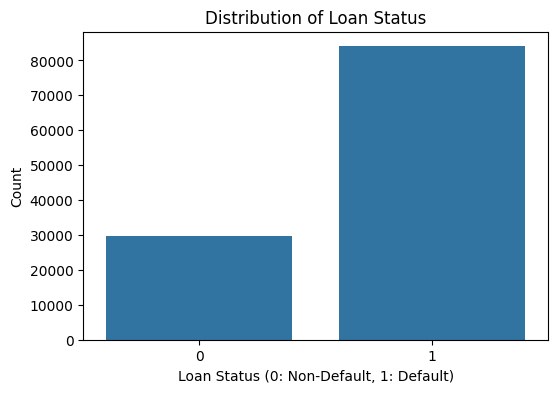

In [27]:
# Plot the distribution of loan status
plt.figure(figsize=(6, 4))
sns.countplot(data=train_data, x='loan_status')
plt.title('Distribution of Loan Status')
plt.xlabel('Loan Status (0: Non-Default, 1: Default)')
plt.ylabel('Count')
plt.show()

In [28]:
# Plot the distribution of CIBIL score
plt.figure(figsize=(8, 5))
sns.histplot(train_data['cibil_score'], bins=30, kde=True)
plt.title('Distribution of CIBIL Score')
plt.xlabel('CIBIL Score')
plt.ylabel('Count')
plt.show()

In [29]:
# Box plot of loan amount by loan status
plt.figure(figsize=(8, 5))
sns.boxplot(data=train_data, x='loan_status', y='loan_amnt')
plt.title('Loan Amount by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Loan Amount')
plt.show()

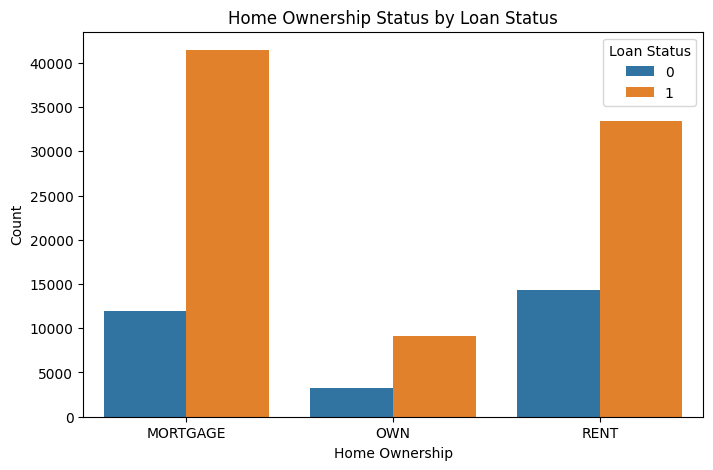

In [30]:
# Count plot for home ownership
plt.figure(figsize=(8, 5))
sns.countplot(data=train_data, x='home_ownership', hue='loan_status')
plt.title('Home Ownership Status by Loan Status')
plt.xlabel('Home Ownership')
plt.ylabel('Count')
plt.legend(title='Loan Status')
plt.show()

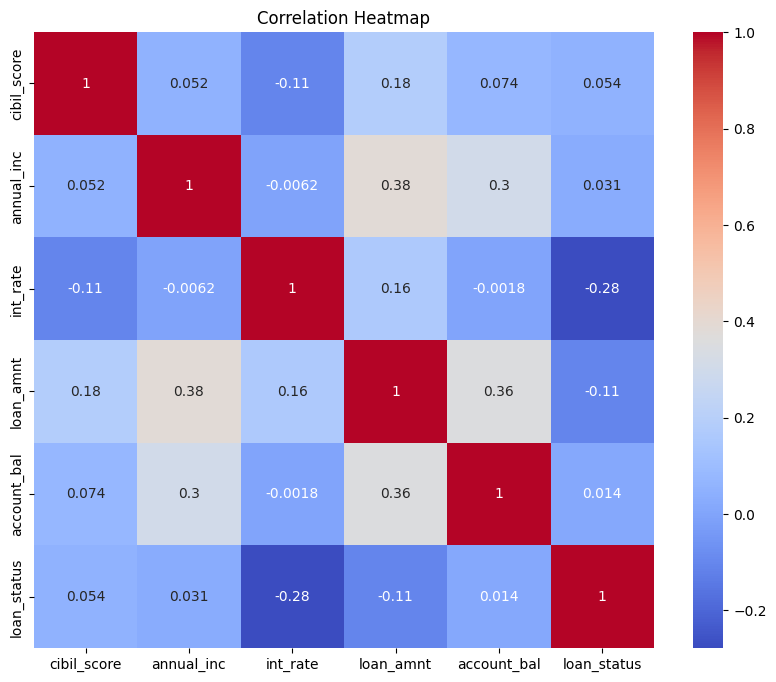

In [31]:
# Correlation heatmap for numerical features
plt.figure(figsize=(10, 8))
correlation_matrix = train_data[['cibil_score', 'annual_inc', 'int_rate', 'loan_amnt', 'account_bal', 'loan_status']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [32]:
# --- Insights ---
print("\nInsights:")
print("- The loan status is imbalanced (check for class imbalance).")
print("- Higher interest rates and lower CIBIL scores may be correlated with defaults.")
print("- Home ownership and loan amount may influence repayment behavior.")


Insights:
- The loan status is imbalanced (check for class imbalance).
- Higher interest rates and lower CIBIL scores may be correlated with defaults.
- Home ownership and loan amount may influence repayment behavior.
